In [1]:
import os
print (os.environ['CONDA_DEFAULT_ENV'])

from rocstuff import *
from histstuff import *
from plotsettings import *
from sels import *
from utils import *
import uproot

rs = rocstuff()
hs = histstuff()
ps = plotsettings()

roccies
init


In [2]:
#how to make roc curves

bproc = 'ttbar'
sproc = 'hww'
group = 'ucsd'

binfo = hs.initcache() # cache
sinfo = hs.initcache() # cache
binfo['group']= group; sinfo['group']= group
binfo['proc']= bproc; sinfo['proc']= sproc

#get arrays
bevts, binfo = getarr(files[bproc][group], basesel, info=binfo)
sevts, sinfo = getarr(files[sproc][group], basesel, info=sinfo)

labels = getsels(group)

sigs = ['Hmu', 'Hel', 'Htau']
bkgs = ['lepT']

out_ucsd, info = rs.roccy(sevts, bevts, labels, sigs, bkgs)
print(out_ucsd.keys())


file ./rootfiles/ucsd/ttbar-6.root
cutstr ((fj_pt>200) & (fj_pt<2500) & (fj_msoftdrop>=20) & (fj_msoftdrop<260) & (abs(fj_eta)<2.4))
file ./rootfiles/ucsd/hww-2.root
cutstr ((fj_pt>200) & (fj_pt<2500) & (fj_msoftdrop>=20) & (fj_msoftdrop<260) & (abs(fj_eta)<2.4))
signal label to mask array ['fj_isHVV_munuqq']
no set variable to plot, using defaults according to signal labels
score to plot ['score_fj_isHVV_munuqq']
MASKING WITH LABEL: ['fj_isHVV_munuqq'][False False False ... False False  True]
('score_fj_ttbar_label', 'score_fj_wjets_label', 'score_fj_isHVV_elenuqq', 'score_fj_isHVV_munuqq', 'score_fj_H_VV_leptauelvqq', 'score_fj_H_VV_leptaumuvqq', 'score_fj_H_VV_hadtauvqq')
NEW ARRAY: [(0.00155149, 0.03309777, 4.9145956e-06, 0.89475507, 3.66109930e-06, 0.07054126, 4.5871209e-05)
 (0.00425501, 0.01674579, 1.6920851e-04, 0.854485  , 1.69152991e-04, 0.12322212, 9.5378468e-04)
 (0.20806941, 0.24219581, 3.3841335e-04, 0.42537057, 2.51752150e-04, 0.12306002, 7.1401329e-04)
 ...
 (0.02735901

In [5]:
bproc2 = 'ttbar'
sproc2 = 'hww'
group2 = 'pku'

binfo2 = hs.initcache() # cache
sinfo2 = hs.initcache() # cache
binfo2['group']= group2; sinfo2['group']= group2
binfo2['proc']= bproc2; sinfo2['proc']= sproc2

#get arrays
bevts2, binfo2 = getarr(files[bproc2][group2], basesel, info=binfo)
sevts2, sinfo2 = getarr(files[sproc2][group2], basesel, info=sinfo)

labels2 = getsels(group2)

sigs = ['Hmu', 'Hel', 'Htau']
bkgs = ['lepW']

out_pku, info = rs.roccy(sevts2, bevts2, labels2, sigs, bkgs)
print(out_pku.keys())

file ./rootfiles/pku/ttbar_pku.root
cutstr ((fj_pt>200) & (fj_pt<2500) & (fj_msoftdrop>=20) & (fj_msoftdrop<260) & (abs(fj_eta)<2.4))
file ./rootfiles/pku/hww_pku.root
cutstr ((fj_pt>200) & (fj_pt<2500) & (fj_msoftdrop>=20) & (fj_msoftdrop<260) & (abs(fj_eta)<2.4))
signal label to mask array ['label_H_WqqWmv_0c', 'label_H_WqqWmv_1c']
no set variable to plot, using defaults according to signal labels
score to plot ['score_label_H_WqqWmv_0c', 'score_label_H_WqqWmv_1c']
mask [False False False ... False False  True]
MASKING WITH LABEL: ['label_H_WqqWmv_0c', 'label_H_WqqWmv_1c'][False False False ... False False  True]
('score_label_H_WqqWqq_0c', 'score_label_H_WqqWqq_1c', 'score_label_H_WqqWqq_2c', 'score_label_H_WqqWq_0c', 'score_label_H_WqqWq_1c', 'score_label_H_WqqWq_2c', 'score_label_H_WqqWev_0c', 'score_label_H_WqqWev_1c', 'score_label_H_WqqWmv_0c', 'score_label_H_WqqWmv_1c', 'score_label_H_WqqWtauev_0c', 'score_label_H_WqqWtauev_1c', 'score_label_H_WqqWtaumv_0c', 'score_label_H_WqqW

/Users/melissaquinnan/miniconda3/envs/roccies/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,
/Users/melissaquinnan/miniconda3/envs/roccies/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,
/Users/melissaquinnan/miniconda3/envs/roccies/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,


initialized roc plot
Hmu_v_lepT
Hel_v_lepT
Htau_v_lepT


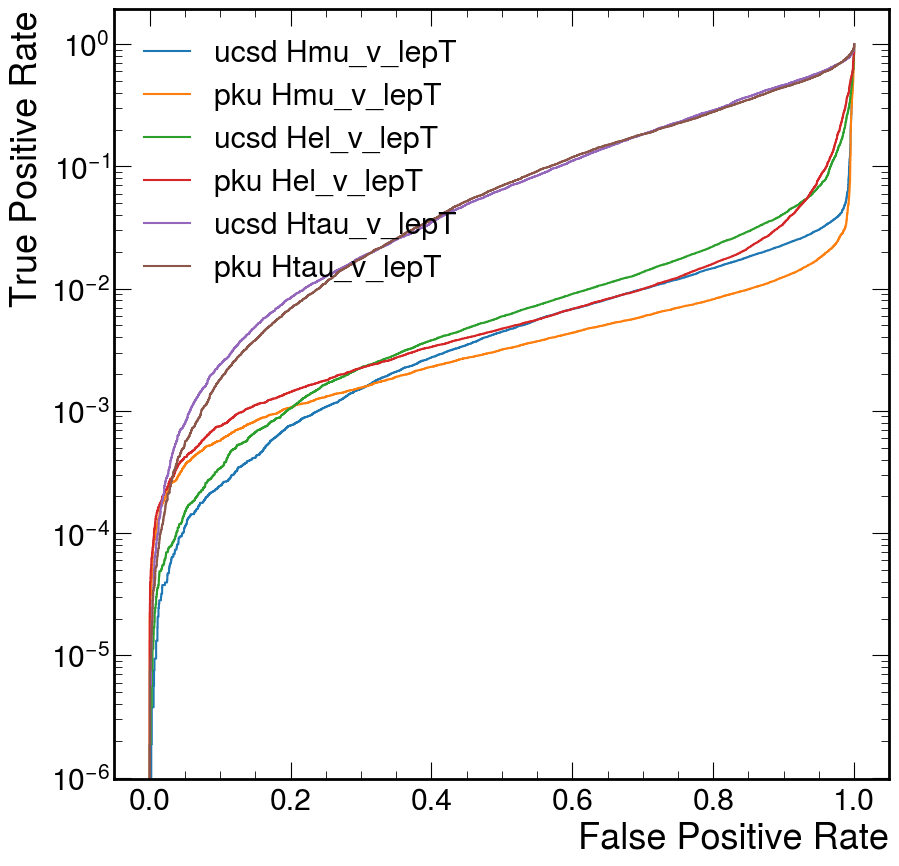

saved roc plot ./plots/rocs/roc_HvT_ucsd_v_pku.png


In [4]:
ps.initroc()

for i, key in enumerate(out_ucsd.keys()):
    print(key)
    label1 = 'ucsd '+key
    label2 = 'pku '+key
    ps.addroc(out_ucsd[key]['tpr'], out_ucsd[key]['fpr'], label1)
    ps.addroc(out_pku[key]['tpr'], out_pku[key]['fpr'], label2)
    
savename = 'HvT_ucsd_v_pku'    
ps.saveroc(savename) 